In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

No comando a baixo, estamos lendo o arquivo

In [ ]:
df = pd.read_csv('MalMem2022_modificado.csv')


In [ ]:
df = df.dropna()

In [ ]:
df.sample(5)

In [ ]:
df_filtrado = df.loc[:, ['svcscan.nactive', 'dlllist.avg_dlls_per_proc',
                         'svcscan.process_services', 'pslist.avg_threads',
                         # Essas duas precisam estar na solução final:
                         'Category', 'Class'
                         ]]

In [ ]:
df_filtrado.sample(5)

In [ ]:
var1 = df_filtrado[df_filtrado['Class']=='Benign'].describe().T[['min','max']]

var2 = df_filtrado[df_filtrado['Class']=='Malware'].describe().T[['min','max']]

print("Benign ")
print(var1)
print(" ")
print("Malware ")
print(var2)


In [ ]:
sns.pairplot(df_filtrado.sample(1000),  hue="Class", kind='scatter')

In [ ]:
vars = ['svcscan.nactive', 'dlllist.avg_dlls_per_proc', 'svcscan.process_services', 'pslist.avg_threads']
for var in vars:
    sns.catplot(data=df_filtrado.sample(1000),
                y=var,
                x='Class',
                kind='swarm'
               )

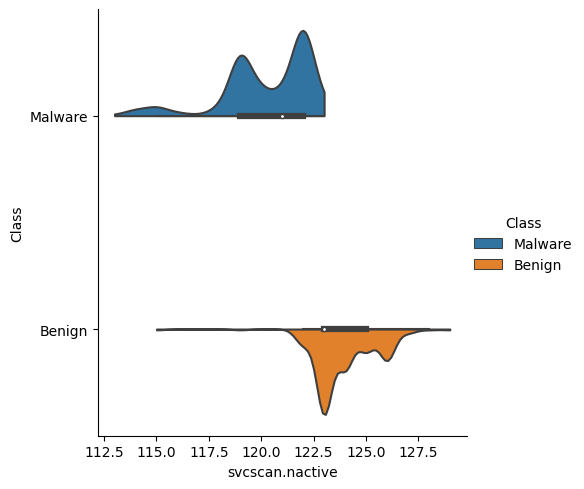

In [42]:
df_filtrado['Category_detail'] = df_filtrado['Category'].apply(lambda x: x if x=="Benign" else x.split('-')[0])

sns.catplot(
    data=df_filtrado.sample(500), x="svcscan.nactive", y='Class' , hue="Class",
    kind="violin", bw=.25, cut=0, split=True,)

In [ ]:
var2 = df_filtrado[df_filtrado['Class']=='Malware'].describe().T[['min','max']]


In [ ]:
pd.concat([df_filtrado.describe().T[['count','mean','min','max']],
    df_filtrado[df_filtrado['Class']=='Benign'].describe().T[['count','mean','min','max']] ,
    df_filtrado[df_filtrado['Class']=='Malware'].describe().T[['count','mean','min','max']]
    ], keys=['All', 'Benign', 'Malware']).drop('count', axis=1).style.bar(color='brown')

In [ ]:
pd.DataFrame.hist(df_filtrado,figsize=(7.5,6),bins=(50), yrot=30, xrot=30)

Ultilizando Boxplot para indetificar "Outliers"

In [ ]:
pd.DataFrame.boxplot(df_filtrado ,figsize=(11,5), rot=10)

In [ ]:
# Extraíndo a categoria de cada malware df_filtrado['Category_detail'] = df_filtrado['Category'].apply(  lambda x: x if x=="Benign" else x.split('-')[0] ) for col in df_filtrado.columns[:4]:  # Removendo outliers  q = df_filtrado[col].quantile(0.95)   df_filtrado_sem_outliers = df_filtrado[df_filtrado[col] < q]  sns.displot(data=df_filtrado_sem_outliers.sample(1000), x=col, hue="Category_detail", kind="kde")
# Extraíndo a categoria de cada malware
df_filtrado['Category_detail'] = df_filtrado['Category'].apply(
 lambda x: x if x=="Benign" else x.split('-')[0]
)   
for col in df_filtrado.columns[:4]:
 # Removendo outliers
 q = df_filtrado[col].quantile(0.95) 
 df_filtrado_sem_outliers = df_filtrado[df_filtrado[col] < q]
 sns.displot(data=df_filtrado_sem_outliers.sample(1000), x=col, hue="Category_detail", kind="kde")

In [ ]:
df_filtrado['Category_detail'] = df_filtrado['Category'].apply(
    lambda x: x if x=="Benign" else x.split('-')[0])
fig = px.scatter_3d(df_filtrado.sample(500), 
                    x='svcscan.nactive', 
                    y='dlllist.avg_dlls_per_proc', 
                    z='svcscan.process_services',
                    color='Category_detail' )
fig.show()


In [ ]:
sns.jointplot(df_filtrado.sample(2000), x="svcscan.nactive", y="dlllist.avg_dlls_per_proc", hue="Class", kind="kde", marginal_kws=dict( fill=True))